In [1]:
import sys
sys.path.append('/home/keeganfl/Desktop/Work_Fall_2021/Fall_2021_Work_journal/tools/')

Maybe I am focusing too much on doing all this at one time. If I just perform the smoothng on each set one at a time I might be able to actually pull this off. 

In [2]:
from tqdm import tqdm

from multiprocess import Pool
from magic_functions import process_frame

frames_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

max_pool = 5

with Pool(max_pool) as p:
    pool_outputs = list(
        tqdm(
            p.imap(process_frame,
                   frames_list),
            total=len(frames_list)
        )
    )    

print(pool_outputs)
new_dict = dict(pool_outputs)

print("dict:", new_dict)

100%|████████████████████████████████████████| 11/11 [00:00<00:00, 93395.43it/s]

[(0, 10), (1, 11), (2, 12), (3, 13), (4, 14), (5, 15), (6, 16), (7, 17), (8, 18), (9, 19), (10, 20)]
dict: {0: 10, 1: 11, 2: 12, 3: 13, 4: 14, 5: 15, 6: 16, 7: 17, 8: 18, 9: 19, 10: 20}


## Loading up packages

In [3]:
import sys
sys.path.append('/home/keeganfl/Desktop/Work_Fall_2021/Fall_2021_Work_journal/tools/')

In [4]:
# import plastid
# data structure for mapping read alignments to genomic positions
from plastid import BAMGenomeArray, VariableFivePrimeMapFactory, \
                        GTF2_TranscriptAssembler, GFF3_TranscriptAssembler, \
                        Transcript, ThreePrimeMapFactory
import numpy as np
import os
from Bio import SeqIO
import numpy
import math
import pandas as pd
from scipy import stats
from scipy.stats import kstwo
import keegan_analysis_tools as kat
from statsmodels.nonparametric.smoothers_lowess import lowess
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import csv
from scipy.sparse.linalg import lsqr

In [5]:
# Define the path to our Bam files
data_path = '/home/keeganfl/Desktop/Work_Fall_2021/genomes_&_samples/ecol/'
csv_path = '/home/keeganfl/Desktop/Work_Fall_2021/data_tables/position_counts/ecol/'
save_path = '/home/keeganfl/Desktop/Work_Fall_2021/data_tables/KS_stats/ecol/'
gtf_name = 'Escherichia_coli_str_k_12_substr_mg1655_gca_000005845.ASM584v2.51.gtf'
mutation = 'efp'
samp_num = '2'
if os.path.isfile(save_path + "ks_table_" + samp_num + ".csv") == True:
    pre_load = True
else:
    pre_load = False

## Loading up the data files 

In [6]:
# load the transcript annotations from the GTF file.
# GTF2_TranscriptAssembler returns an iterator, so here we convert it to a list.
transcripts = list(GTF2_TranscriptAssembler(open(data_path + gtf_name),return_type=Transcript))

In [7]:
# Remove non-protein coding transcripts from transcripts list. 
protein_coding = []
for transcript in transcripts:
    if transcript.attr['gene_biotype'] == 'protein_coding':
        protein_coding.append(transcript)

In [8]:
# clear up some memory by deleting original transcript list
transcripts.clear()

# Loading up the csv file.

In [9]:
data_mutant = kat.load_count_positions(mutation+"_RPF_"+samp_num+"_counts.csv",csv_path)
data_control = kat.load_count_positions("control_RPF_"+ samp_num +"_counts.csv",csv_path)

## Determine KS statistic for all transcripts

In [10]:
from tqdm import tqdm

from multiprocess import Pool
from magic_functions import process_frame

max_pool = 20

with Pool(max_pool) as p:
    pool_outputs = list(
        tqdm(
            p.imap(kat.get_smoothed_vector_parallel,
                   data_control),
            total=len(frames_list)
        )
    )    

  0%|                                                    | 0/11 [00:00<?, ?it/s]---------------------------------------------------------------------------
RuntimeWarning
invalid value encountered in double_scalars
in /home/keeganfl/Desktop/Work_Fall_2021/Fall_2021_Work_journal/tools/keegan_analysis_tools.py, line 270:

268             mean_y = sum_weight_y / sum_weight
270             b = (sum_weight_xy - mean_x * mean_y * sum_weight) / \
271                 (sum_weight_x2 - mean_x * mean_x * sum_weight)
272             a = mean_y - b * mean_x

---------------------------------------------------------------------------
---------------------------------------------------------------------------
RuntimeWarning
divide by zero encountered in double_scalars
in /home/keeganfl/Desktop/Work_Fall_2021/Fall_2021_Work_journal/tools/keegan_analysis_tools.py, line 270:

268             mean_y = sum_weight_y / sum_weight
270             b = (sum_weight_xy - mean_x * mean_y * sum_weight) / \
271    

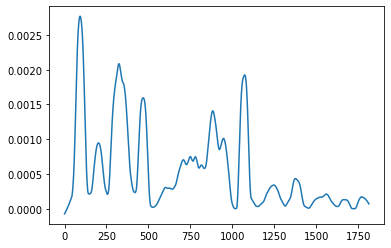

In [11]:
plt.plot(pool_outputs[385][0])

I DID IT!!! WOOO, THE SIMPLEST PARALLELIZATION IN THE ENTIRE UNIVERSE WHY DID THIS TAKE ME SOOOO LOOOOONG